In [ ]:
!pip install turicreate
import turicreate as tc

In [ ]:
sales = tc.SFrame('/content/drive/MyDrive/home_data.sframe')
sales

In [112]:
tc.show(sales[0:5000]['sqft_living'],sales[0:5000]['price'])


Materializing X axis SArray

Materializing Y axis SArray

#create regression model

In [113]:
training_set, test_set = sales.random_split(0.8, seed = 0)

##build model

In [114]:
sqft_model = tc.linear_regression.create(training_set, target='price', features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

##evaluate the model

In [115]:
print(test_set['price'].mean())

| 1         | 2        | 0.003642     | 4368196.192106     | 4293672.642662       | 261574.613545                   | 287799.958233                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

543054.0425632533


In [116]:
print(sqft_model.evaluate(test_set))

{'max_error': 4158185.8106143544, 'rmse': 255154.915425952}


##what do our predictions look like


In [117]:
import matplotlib.pyplot as plt


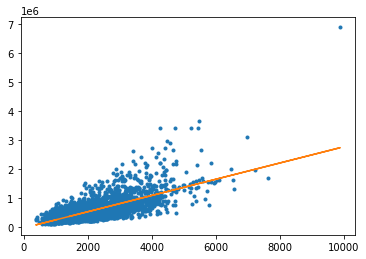

In [118]:
plt.plot(test_set['sqft_living'], test_set['price'], '.',
         test_set['sqft_living'], sqft_model.predict(test_set), '-')

# compare the actual test data with the predicted test data

In [119]:
sqft_model.coefficients

name,index,value,stderr
(intercept),None,-43254.01757982804,5028.391337646038
sqft_living,None,280.0877863463573,2.2111449127035225


## explore other features

In [120]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [121]:
sales[features].show()

Materializing SFrame

In [122]:
tc.visualization.box_plot(sales['zipcode'],sales['price'])
# tc.show(sales['zipcode'],sales['price'])

#build a regression model with more features


In [123]:
more_features_model = tc.linear_regression.create(training_set, target = 'price', features = features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 75

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.029453     | 4093276.675583     | 1857040.356950       | 189949.625269                   | 175186.067266                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [124]:
print(sqft_model.evaluate(test_set))
print(more_features_model.evaluate(test_set))

{'max_error': 4158185.8106143544, 'rmse': 255154.915425952}
{'max_error': 3126468.5473171067, 'rmse': 180313.86796028516}


#apply models to predict prices of 3 houses

In [125]:
house1 = sales[sales['id'] == '5309101200']
print (house1)

+------------+---------------------------+----------+----------+-----------+
|     id     |            date           |  price   | bedrooms | bathrooms |
+------------+---------------------------+----------+----------+-----------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000.0 |   4.0    |    2.25   |
+------------+---------------------------+----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    2400.0   |  5350.0  |  1.5   |     0      |  0   |     4     |  7.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------

In [126]:
print(house1['price'])
print(sqft_model.predict(house1))
print(more_features_model.predict(house1))


[620000.0, ... ]
[628956.6696514294]
[728293.6748050309]


---

#Week 2 assignment

###q1

In [127]:
zipCode = sales.groupby(key_column_names = 'zipcode', 
                        operations = {'avg_price' : tc.aggregate.MEAN('price')})

# print(zipCode)

zipCode = zipCode[zipCode['avg_price'] == max(zipCode['avg_price'])]

# print(zipCode)

zipCode = zipCode[0]['zipcode']

# print(zipCode)

ans = sales[sales['zipcode'] == zipCode]

ans = ans['price'].mean()

print(ans)

2160606.6000000006


###q2

In [128]:
ans = sales.filter_by(filter(lambda x : x > 2000 and x <= 4000, 
                             sales['sqft_living']), 'sqft_living')

print(len(ans)/len(sales))

0.42187572294452413


###q3

In [129]:
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house				
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

more_features_model = tc.linear_regression.create(training_set, target = 'price', features = features)
advanced_features_model = tc.linear_regression.create(training_set, target = 'price', features = advanced_features)

ans = abs(more_features_model.evaluate(test_set)['rmse'] - advanced_features_model.evaluate(test_set)['rmse'])
print(ans)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 75

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.048271     | 4083759.378590     | 2123327.078340       | 189066.620647                   | 192441.280730                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 87

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.123967     | 4331359.400112     | 2328096.840961       | 162539.216813                   | 160073.508390                     |

| 2         | 3        | 0.192281     | 4331359.400103     | 2328096.840981       | 162539.216813                   | 160073.508391                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

25056.02467277026
